# Function Approximation

In [202]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## Import linear data

In [203]:
dataset = pd.read_csv('1in_linear.txt', sep=" ", header=None, delimiter="\t")
x = dataset.iloc[:, 0 ].values
y = dataset.iloc[:, 1 ].values
y_actual = asarray([i for i in x])
label = 'Linear'

## Import cubic data

In [204]:
dataset = pd.read_csv('1in_cubic.txt', sep="\s+", header=None, delimiter="\s+")
x = dataset.iloc[:, 0 ].values
y = dataset.iloc[:, 1 ].values
y_actual = asarray([pow(i,3) for i in x])
label = 'Cubic'

## Import sine data

In [212]:
dataset = pd.read_csv('1in_sine.txt', sep="\s+", header=None, delimiter="\s+")
x = dataset.iloc[:, 0 ].values
y = dataset.iloc[:, 1 ].values
y_actual = asarray([np.sin(i) for i in x])
label = 'Sine'

## Import tanh data

In [221]:
dataset = pd.read_csv('1in_tanh.txt', sep="\s+", header=None, delimiter="\s+")
x = dataset.iloc[:, 0 ].values
y = dataset.iloc[:, 1 ].values
y_actual = asarray([np.tanh(i) for i in x])
label = 'Tanh'

## Import xor data

In [249]:
dataset = pd.read_csv('2in_xor.txt', sep="\s+", header=None, delimiter="\s+")
x = dataset.iloc[:, 0:2 ].values
##y = dataset.iloc[:, 2 ].values
##y_actual = asarray([x[1,i]^x[2,i] for i in x])
label = 'XOR'
print(x)

[[0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]]


## Initilise ANN

In [222]:
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [223]:
ann = Sequential()
ann.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
ann.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
ann.add(Dense(1))

## Compile and run ANN

In [224]:
ann.compile(loss='mse', optimizer='adam')

In [225]:
ann.fit(x, y, epochs=500, batch_size=10, verbose=0)

In [226]:
yhat = ann.predict(x)

## Print Mean Squared Error and plot comparison

In [227]:
print('MSE: %.3f' %mean_squared_error(y_actual, yhat))

MSE: 0.277


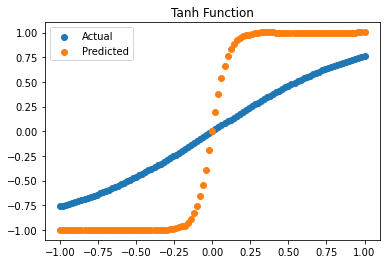

In [228]:
plt.scatter(x,y_actual, label = 'Actual')
plt.scatter(x, yhat, label = 'Predicted')
plt.title(label + ' Function')
plt.legend()
plt.show()